<a href="https://colab.research.google.com/github/mmiqdam/GISportfolio/blob/main/NDVI_%26_Slope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Geospatial Analysis: Raster Data**

landsat 8 (NDVI), DEM (Slope), and Raster Statistics

In [ ]:
!pip install rasterio
!pip install rasterstats

import rasterio
from rasterio.plot import show

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from rasterstats import zonal_stats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 533.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 49.5 MB/s eta 0:00:00


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Determine the desired storage location
loc = '/content/drive/MyDrive/Geoacss/Phyton GIS/Data Simulasi/Raster'

# Change to the previously defined storage location
os.chdir(loc)

# Check if the storage location matches the one we specified
print('Working Directory: ',os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Working Directory:  /content/drive/MyDrive/Geoacss/Phyton GIS/Data Simulasi/Raster


**READING AND WRITING RASTER DATA**

In [ ]:
# Read raster data
l8 = rasterio.open('L8_2020_YOGYAKARTA.tif')

# Check data type of l8
type(l8)

rasterio.io.DatasetReader

In [ ]:
with rasterio.open('output_raster.tif', 'w',
                   driver='GTiff',
                   height=l8.height,
                   width=l8.width,
                   count=1,
                   dtype=rasterio.float32,
                   crs=l8.crs,
                   transform=l8.transform) as dst:
    dst.write(l8.read(1), 1)

# **Raster Data Exploration**


In [ ]:
# Basic information about the raster
print(l8.name)        # File name
print(l8.count)       # Number of bands
print(l8.width)       # Raster width (pixels)
print(l8.height)      # Raster height (pixels)
print(l8.crs)         # Coordinate Reference System (CRS)

L8_2020_YOGYAKARTA.tif
7
870
569
EPSG:4326


In [ ]:
# Check overall raster metadata
l8.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 870,
 'height': 569,
 'count': 7,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.00026949458523585647, 0.0, 110.248078863307,
        0.0, -0.00026949458523585647, -7.7123960402797405)}

In [ ]:
# Read information for a specific band
l8.read(1)

array([[0.0233825 , 0.021375  , 0.02165   , ..., 0.02374   , 0.022475  ,
        0.0265725 ],
       [0.0233275 , 0.02253   , 0.01769   , ..., 0.0222825 , 0.021925  ,
        0.0181025 ],
       [0.019065  , 0.018955  , 0.0178825 , ..., 0.02352   , 0.0220075 ,
        0.02088   ],
       ...,
       [0.031495  , 0.02853875, 0.02903375, ..., 0.018515  , 0.01791   ,
        0.019945  ],
       [0.0344375 , 0.03309   , 0.02864875, ..., 0.01984875, 0.02061875,
        0.0248675 ],
       [0.0352075 , 0.0348225 , 0.02979   , ..., 0.02097625, 0.01990375,
        0.019835  ]])

# **SINGLEBAND**

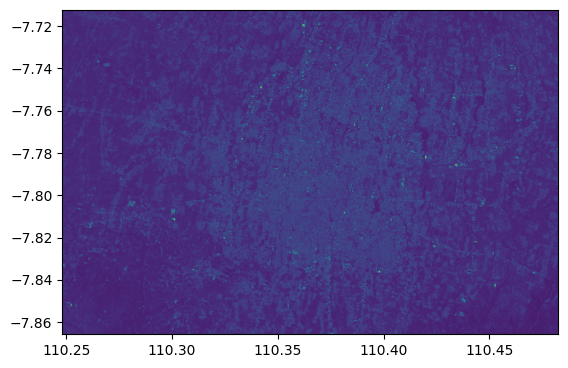

<Axes: >

In [ ]:
# Display raster data
show((l8, 2))

Text(0.5, 1.0, 'Blue')

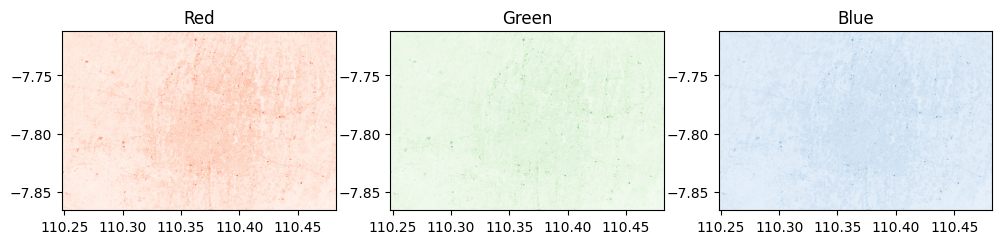

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

# Display per band
show((l8, 4), ax=ax1, cmap='Reds', vmin=l8.read(4).min(), vmax=l8.read(4).max())
show((l8, 3), ax=ax2, cmap='Greens', vmin=l8.read(3).min(), vmax=l8.read(3).max())
show((l8, 2), ax=ax3, cmap='Blues', vmin=l8.read(2).min(), vmax=l8.read(2).max())

# Add titles
ax1.set_title('Red')
ax2.set_title('Green')
ax3.set_title('Blue')

# **VISUALISASI MULTIBAND/COMPOSITE**

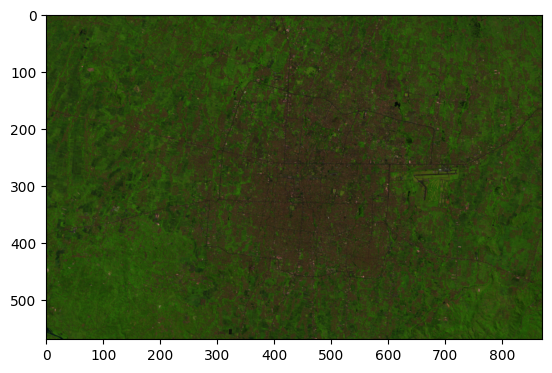

(np.float64(0.01400499999999999), np.float64(0.8146125000000001))

In [ ]:
red = l8.read(6)
green = l8.read(5)
blue = l8.read(4)

rgb = np.stack((red, green, blue))
show(rgb)


# To see min-max values
red.min(), red.max()

# **PIXEL VALUE RANGE NORMALIZATION**

In [ ]:
# Create a function to perform Normalization
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

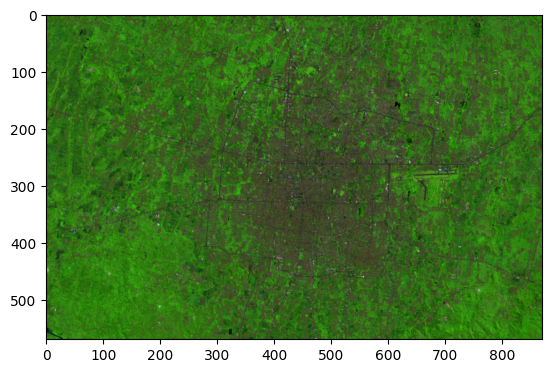

In [ ]:
# Normalize bands
red_n = normalize(red)
green_n = normalize(green)
blue_n = normalize(blue)

# Combine into RGB
rgb = np.dstack((red_n, green_n, blue_n))

# Display RGB
plt.imshow(rgb)

In [ ]:
# Check min-max values
red_n.min(), red_n.max()

(np.float64(0.0), np.float64(1.0))

# **FALSE COLOR VISUALIZATION**

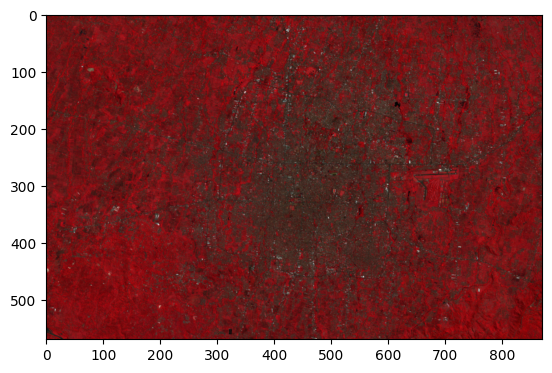

In [ ]:
# False Color Composite
nir  = l8.read(5)
red  = l8.read(4)
green= l8.read(3)

# Normalize values
nir_n = normalize(nir)
red_n = normalize(red)
green_n = normalize(green)

# Combine into RGB
nrg = np.dstack((nir_n, red_n, green_n))

# Display RGB
plt.imshow(nrg)

In [ ]:
from rasterio.mask import mask

<Axes: >

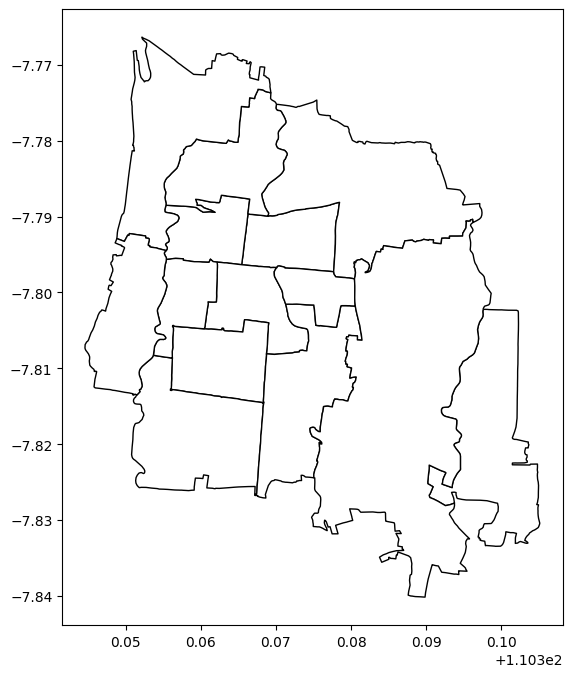

In [ ]:
# Call the vector data that we will use to clip the raster
adm_yogya = gpd.read_file('Batas_Adm_Yogyakarta.shp')
adm_yogya.plot(figsize=(8,8), facecolor='w', edgecolor='k')

In [ ]:
# Check the CRS for raster and vector data, whether they have the same CRS
print(l8.crs)
print(adm_yogya.crs)

EPSG:4326
EPSG:4326


In [ ]:
# Access the geometry column into its own variable
geometry = adm_yogya.geometry
geometry

0     POLYGON ((110.37022 -7.79654, 110.37016 -7.796...
1     POLYGON ((110.35542 -7.79565, 110.35543 -7.795...
2     POLYGON ((110.39482 -7.78847, 110.39712 -7.788...
3     POLYGON ((110.36874 -7.80809, 110.36887 -7.806...
4     POLYGON ((110.36893 -7.78995, 110.36852 -7.789...
5     POLYGON ((110.40143 -7.81923, 110.4017 -7.8193...
6     POLYGON ((110.36288 -7.81378, 110.36275 -7.813...
7     POLYGON ((110.36288 -7.81378, 110.36395 -7.813...
8     POLYGON ((110.37626 -7.81571, 110.37622 -7.815...
9     POLYGON ((110.35623 -7.80867, 110.35592 -7.808...
10    POLYGON ((110.38046 -7.79821, 110.3805 -7.7991...
11    POLYGON ((110.35541 -7.79448, 110.35472 -7.794...
12    POLYGON ((110.3952 -7.83427, 110.39491 -7.8349...
13    POLYGON ((110.35371 -7.80828, 110.3536 -7.8085...
Name: geometry, dtype: geometry

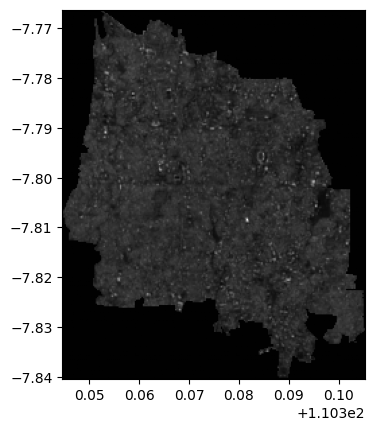

<Axes: >

In [ ]:
# Perform raster clipping using polygon geometry
l8_clip, l8_clip_transform = mask(l8, geometry, crop=True)
show(l8_clip[0], transform=l8_clip_transform, cmap='gray')

In [ ]:
# Update clipped raster metadata
l8_clip_meta = l8.meta.copy()
l8_clip_meta.update({
    "height": l8_clip.shape[1],
    "width": l8_clip.shape[2],
    "transform": l8_clip_transform
})

In [ ]:
# Now let's check the metadata
l8_clip_meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 225,
 'height': 275,
 'count': 7,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.00026949458523585647, 0.0, 110.34455792482143,
        0.0, -0.00026949458523585647, -7.766294957326911)}

In [ ]:
l8.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 870,
 'height': 569,
 'count': 7,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.00026949458523585647, 0.0, 110.248078863307,
        0.0, -0.00026949458523585647, -7.7123960402797405)}

In [ ]:
# Save the clipping result
with rasterio.open('l8_clip.tif', 'w', **l8_clip_meta) as dst:
    dst.write(l8_clip)

# **MATHEMATICAL OPERATIONS ON RASTER DATA**

In [ ]:
# Open the raster data that we saved above
l8_clip = rasterio.open('l8_clip.tif')

In [ ]:
# Create a Normalized Difference Vegetation Index (NDVI) Map
# Calculate NDVI
ndvi = (l8_clip.read(5) - l8_clip.read(4)) / (l8_clip.read(5) + l8_clip.read(4))

/tmp/ipython-input-25-329020524.py:3: RuntimeWarning: invalid value encountered in divide
  ndvi = (l8_clip.read(5) - l8_clip.read(4)) / (l8_clip.read(5) + l8_clip.read(4))


In [ ]:
# Save the NDVI raster
with rasterio.open('ndvi.tif', 'w', **l8_clip_meta) as dst:
    dst.write(ndvi, 1)

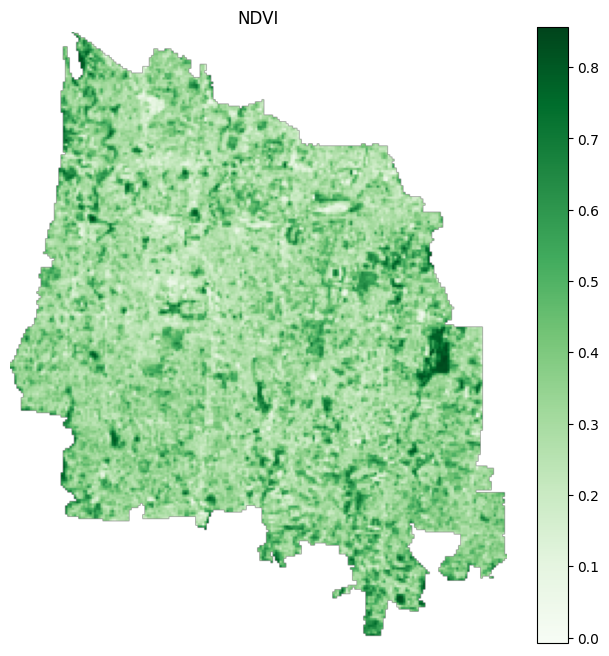

In [ ]:
# Visualize NDVI

ndvi = rasterio.open('ndvi.tif')

plt.figure(figsize=(8, 8))
plt.axis('off')

plt.imshow(ndvi.read(1), cmap='Greens')
plt.title('NDVI')
plt.colorbar()

plt.show()

# **DATA DEM**

In [ ]:
# Import SRTM Yogyakarta data
dem = rasterio.open('SRTM_YOGYAKARTA.tif')

# Check metadata
dem.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 870,
 'height': 569,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.0002694945852358564, 0.0, 110.24822435598082,
        0.0, -0.0002694945852358564, -7.712531608301923)}

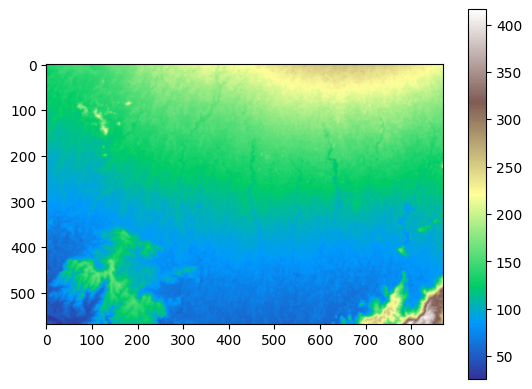

In [ ]:
# Visualize DEM data
plt.imshow(dem.read(1), cmap='terrain')
plt.colorbar()
plt.show()

In [ ]:
!pip install whitebox  # Library for DEM data analysis, another alternative besides richDEM library
import whitebox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 560.5 kB/s eta 0:00:00


In [ ]:
# Initialize WhiteboxTools
wbt = whitebox.WhiteboxTools()
wbt.work_dir = '/content/drive/MyDrive/Geoacss/Phyton GIS/Data Simulasi/Raster'  # Use the current working directory
wbt.verbose = False  # Disable displaying process

Decompressing WhiteboxTools_linux_musl.zip ...
WhiteboxTools package directory: /usr/local/lib/python3.11/dist-packages/whitebox


# **SLOPE ANALYSIS**

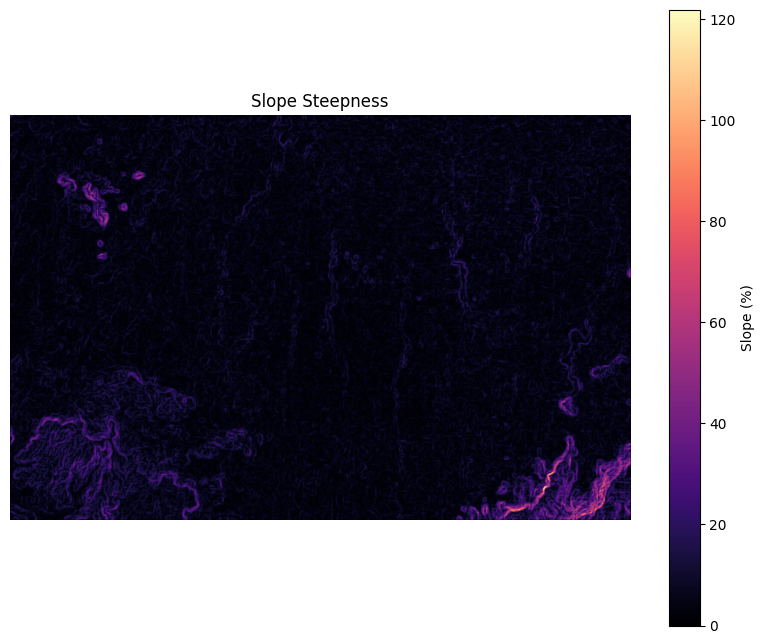

In [ ]:
# Input and output files
input_dem = 'SRTM_YOGYAKARTA.tif'
output_slope = 'slope.tif'

# Calculate slope (%)
wbt.slope(
    dem=input_dem,
    output=output_slope,
    zfactor=1.0,
    units='percent'
)

# Read slope results
with rasterio.open(output_slope) as src:
    slope = src.read(1)

# Display slope
plt.figure(figsize=(10, 8))
plt.imshow(slope, cmap='magma')
plt.colorbar(label='Slope (%)')
plt.title('Slope Steepness')
plt.axis('off')
plt.show()

# **ASPECT ANALYSIS/DIRECTION FACING SLOPE**

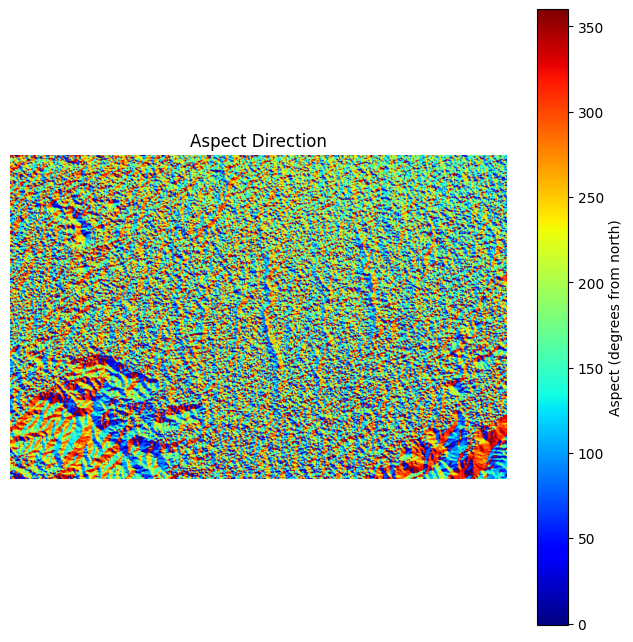

In [ ]:
# Initialize whitebox
wbt = whitebox.WhiteboxTools()
wbt.work_dir = '/content/drive/MyDrive/Geoacss/Phyton GIS/Data Simulasi/Raster'  # Working folder, adjust if files are in another folder
wbt.verbose = False

# Input/output file names
input_dem = 'SRTM_YOGYAKARTA.tif'
output_aspect = 'aspect.tif'

# Calculate aspect
wbt.aspect(
    dem=input_dem,
    output=output_aspect
)

# Read aspect results
with rasterio.open(output_aspect) as src:
    aspect = src.read(1)

# Visualize aspect
plt.figure(figsize=(8, 8))
plt.imshow(aspect, cmap='jet')
plt.colorbar(label='Aspect (degrees from north)')
plt.title('Aspect Direction')
plt.axis('off')
plt.show()

In [ ]:
!pip install rasterstats
from rasterstats import zonal_stats

<Axes: >

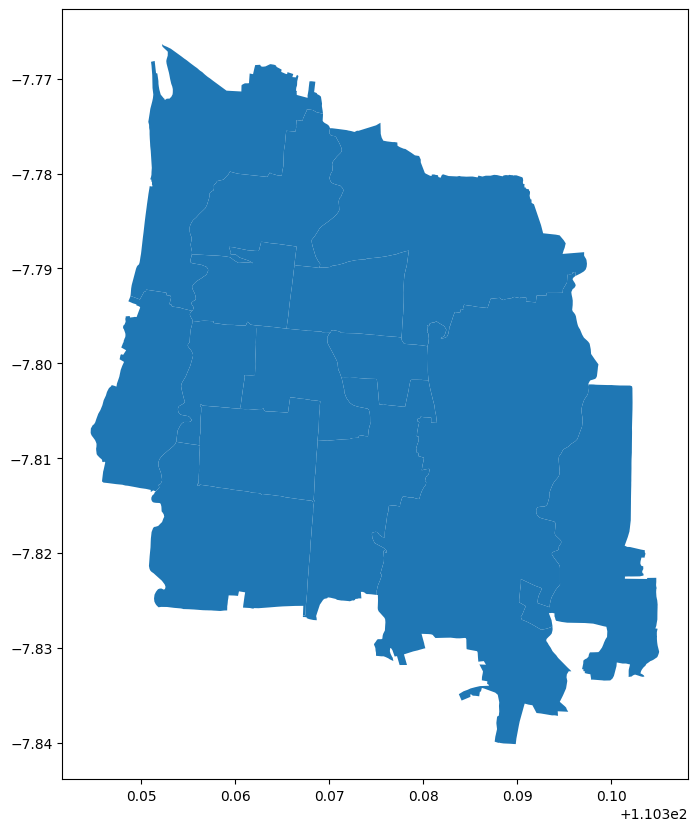

In [ ]:
# Read Vector Data as zone
zones = adm_yogya.copy()
zones.plot(figsize= (10,10))

In [ ]:
zonal_stats_result = zonal_stats(zones, 'ndvi.tif', stats=['mean', 'max', 'min', 'sum', 'std', 'median'])
zonal_stats_result

/usr/local/lib/python3.11/dist-packages/rasterstats/io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


[{'min': 0.06170054085898179,
  'max': 0.6872263210985416,
  'mean': 0.2875250706244817,
  'sum': 360.2689134924755,
  'std': 0.08479687910909373,
  'median': 0.27750698889836295},
 {'min': 0.05004316076802843,
  'max': 0.7017457076056027,
  'mean': 0.2935077607107715,
  'sum': 321.9780134997163,
  'std': 0.09560788952472463,
  'median': 0.2823407570512881},
 {'min': -0.007562364957768677,
  'max': 0.78079780136618,
  'mean': 0.33076157843829934,
  'sum': 1537.049055002777,
  'std': 0.10865855860931209,
  'median': 0.31323315221657255},
 {'min': 0.0509506871049467,
  'max': 0.7529963971464252,
  'mean': 0.3008498496150723,
  'sum': 388.6980057026734,
  'std': 0.11836245697901662,
  'median': 0.2749852301633149},
 {'min': 0.0456919881679149,
  'max': 0.7996799980751764,
  'mean': 0.31113494362351446,
  'sum': 616.3583233181821,
  'std': 0.11015772776318977,
  'median': 0.2902228409877092},
 {'min': 0.03724843798998097,
  'max': 0.8564921021054972,
  'mean': 0.3864361554894243,
  'sum': 

In [ ]:
# Convert Zonal Statistics results into a DataFrame
zonal_stats_df = pd.DataFrame(zonal_stats_result)
zonal_stats_df

min       max      mean          sum       std    median
0   0.061701  0.687226  0.287525   360.268913  0.084797  0.277507
1   0.050043  0.701746  0.293508   321.978013  0.095608  0.282341
2  -0.007562  0.780798  0.330762  1537.049055  0.108659  0.313233
3   0.050951  0.752996  0.300850   388.698006  0.118362  0.274985
4   0.045692  0.799680  0.311135   616.358323  0.110158  0.290223
5   0.037248  0.856492  0.386436  1315.815109  0.117236  0.363609
6   0.116850  0.658000  0.346481   542.936224  0.079098  0.334812
7   0.057252  0.814075  0.364417  1097.259697  0.105364  0.344411
8   0.065461  0.771354  0.338495   900.056968  0.104267  0.319415
9   0.082065  0.751381  0.301368   280.272416  0.093428  0.283448
10  0.121912  0.702784  0.316312   230.907969  0.087578  0.297110
11  0.045626  0.856358  0.371359  1252.963887  0.130120  0.344329
12  0.023146  0.835087  0.378293  3479.915318  0.130688  0.351925
13  0.100511  0.800165  0.351386   706.638133  0.096349  0.332214

In [ ]:
# Merge zonal statistics results into the Yogyakarta administration GeoDataFrame
zones = zones.merge(zonal_stats_df, left_index=True, right_index=True)
zones

NAME_2         NAME_3  \
0   Kota Yogyakarta      Danurejan   
1   Kota Yogyakarta  Gedong Tengen   
2   Kota Yogyakarta   Gondokusuman   
3   Kota Yogyakarta     Gondomanan   
4   Kota Yogyakarta          Jetis   
5   Kota Yogyakarta       Kotagede   
6   Kota Yogyakarta         Kraton   
7   Kota Yogyakarta    Mantrijeron   
8   Kota Yogyakarta     Mergangsan   
9   Kota Yogyakarta      Ngampilan   
10  Kota Yogyakarta     Pakualaman   
11  Kota Yogyakarta      Tegalrejo   
12  Kota Yogyakarta     Umbulharjo   
13  Kota Yogyakarta     Wirobrajan   

                                             geometry       min       max  \
0   POLYGON ((110.37022 -7.79654, 110.37016 -7.796...  0.061701  0.687226   
1   POLYGON ((110.35542 -7.79565, 110.35543 -7.795...  0.050043  0.701746   
2   POLYGON ((110.39482 -7.78847, 110.39712 -7.788... -0.007562  0.780798   
3   POLYGON ((110.36874 -7.80809, 110.36887 -7.806...  0.050951  0.752996   
4   POLYGON ((110.36893 -7.78995, 110.36852 -7.789...  0.045692  0.799680   
5   POLYGON ((110.40143 -7.81923, 110.4017 -7.8193...  0.037248  0.856492   
6   POLYGON ((110.36288 -7.81378, 110.36275 -7.813...  0.116850  0.658000   
7   POLYGON ((110.36288 -7.81378, 110.36395 -7.813...  0.057252  0.814075   
8   POLYGON ((110.37626 -7.81571, 110.37622 -7.815...  0.065461  0.771354   
9   POLYGON ((110.35623 -7.80867, 110.35592 -7.808...  0.082065  0.751381   
10  POLYGON ((110.38046 -7.79821, 110.3805 -7.7991...  0.121912  0.702784   
11  POLYGON ((110.35541 -7.79448, 110.35472 -7.794...  0.045626  0.856358   
12  POLYGON ((110.3952 -7.83427, 110.39491 -7.8349...  0.023146  0.835087   
13  POLYGON ((110.35371 -7.80828, 110.3536 -7.8085...  0.100511  0.800165   

        mean          sum       std    median  
0   0.287525   360.268913  0.084797  0.277507  
1   0.293508   321.978013  0.095608  0.282341  
2   0.330762  1537.049055  0.108659  0.313233  
3   0.300850   388.698006  0.118362  0.274985  
4   0.311135   616.358323  0.110158  0.290223  
5   0.386436  1315.815109  0.117236  0.363609  
6   0.346481   542.936224  0.079098  0.334812  
7   0.364417  1097.259697  0.105364  0.344411  
8   0.338495   900.056968  0.104267  0.319415  
9   0.301368   280.272416  0.093428  0.283448  
10  0.316312   230.907969  0.087578  0.297110  
11  0.371359  1252.963887  0.130120  0.344329  
12  0.378293  3479.915318  0.130688  0.351925  
13  0.351386   706.638133  0.096349  0.332214

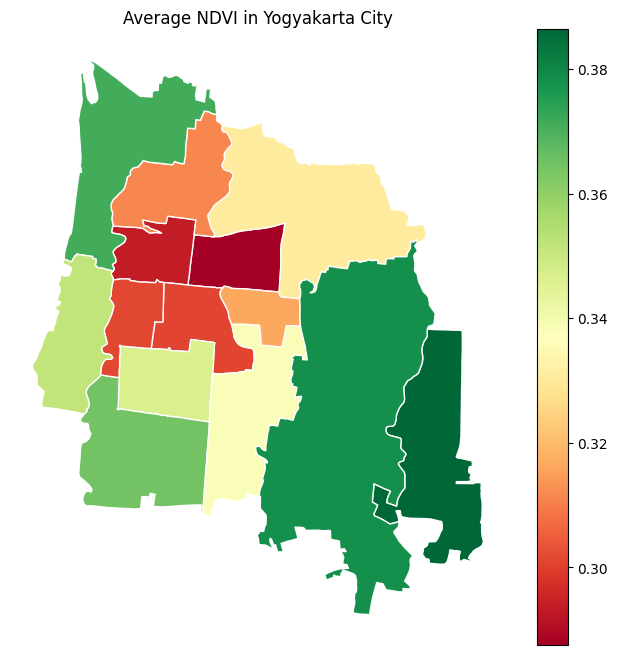

In [ ]:
# Display Visualization of Average NDVI based on administrative boundaries
fig, ax = plt.subplots(figsize = (8,8))

zones.plot(ax=ax,
           column='mean',
           cmap='RdYlGn',
           legend=True,
           edgecolor='w')

ax.set_title('Average NDVI in Yogyakarta City')
ax.set_axis_off()

plt.show()